In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline


In [ ]:

!wget -q https://zenodo.org/record/5167597/files/time_series_covid19_confirmed_global.csv
df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,145008,145552,145996,146523,146523,146523,147985,148572,148933,149361
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132922,132952,132999,133036,133081,133121,133146,133211,133310,133442
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,165204,167131,168668,170189,171392,172564,173922,175229,176724,178013
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14586,14586,14655,14678,14678,14678,14747,14766,14797,14809
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,42110,42288,42486,42646,42777,42815,42970,43070,43158,43269


/tmp/ipython-input-3-4138103815.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long["Date"] = pd.to_datetime(df_long["Date"])


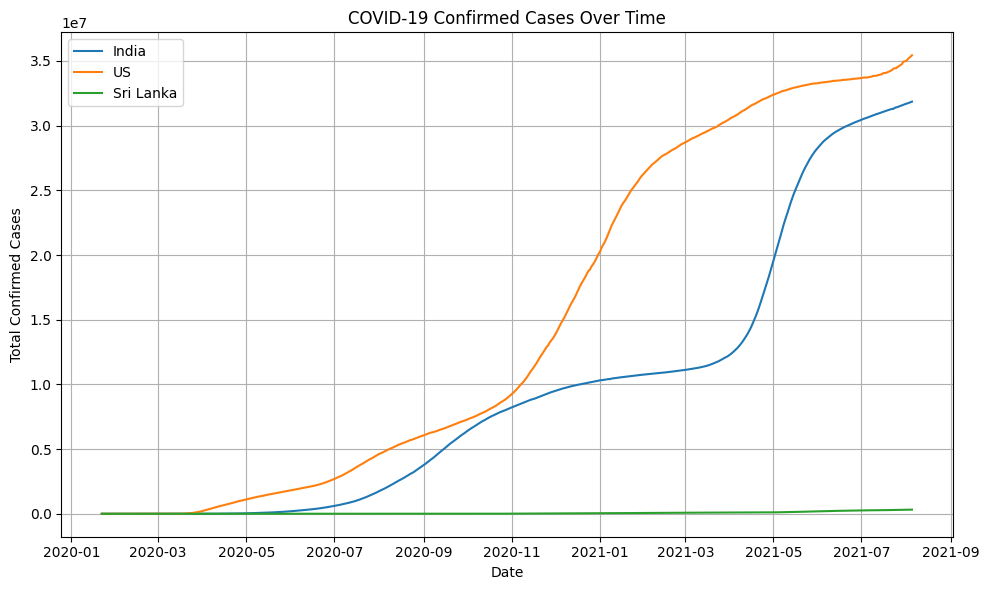

In [ ]:
#Reshape the data
df_long = df.drop(['Lat', 'Long'], axis=1)
df_long = df_long.melt(id_vars=["Province/State", "Country/Region"],
                       var_name="Date", value_name="Confirmed")

#Clean & convert types
df_long["Date"] = pd.to_datetime(df_long["Date"])
df_long = df_long.groupby(["Country/Region", "Date"]).sum().reset_index()

#Filter selected countries
countries = ["India", "US", "Sri Lanka"]
filtered_df = df_long[df_long["Country/Region"].isin(countries)]

#Plot
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = filtered_df[filtered_df["Country/Region"] == country]
    plt.plot(country_data["Date"], country_data["Confirmed"], label=country)

#Beautify the plot
plt.title("COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Load the deaths
!wget -q https://zenodo.org/record/5167597/files/time_series_covid19_deaths_global.csv
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
df_deaths.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,6515,6577,6615,6677,6677,6677,6774,6804,6836,6864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2456,2457,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4112,4161,4189,4219,4254,4291,4329,4370,4404,4441
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,128,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,994,1000,1003,1008,1011,1016,1018,1022,1026,1032


In [5]:
# Reshape deaths data
df_deaths_long = df_deaths.drop(['Lat', 'Long'], axis=1)
df_deaths_long = df_deaths_long.melt(id_vars=["Province/State", "Country/Region"],
                                     var_name="Date", value_name="Deaths")
df_deaths_long["Date"] = pd.to_datetime(df_deaths_long["Date"])
df_deaths_long = df_deaths_long.groupby(["Country/Region", "Date"]).sum().reset_index()

# Filter selected countries
deaths_filtered = df_deaths_long[df_deaths_long["Country/Region"].isin(countries)]


/tmp/ipython-input-5-558684489.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_deaths_long["Date"] = pd.to_datetime(df_deaths_long["Date"])


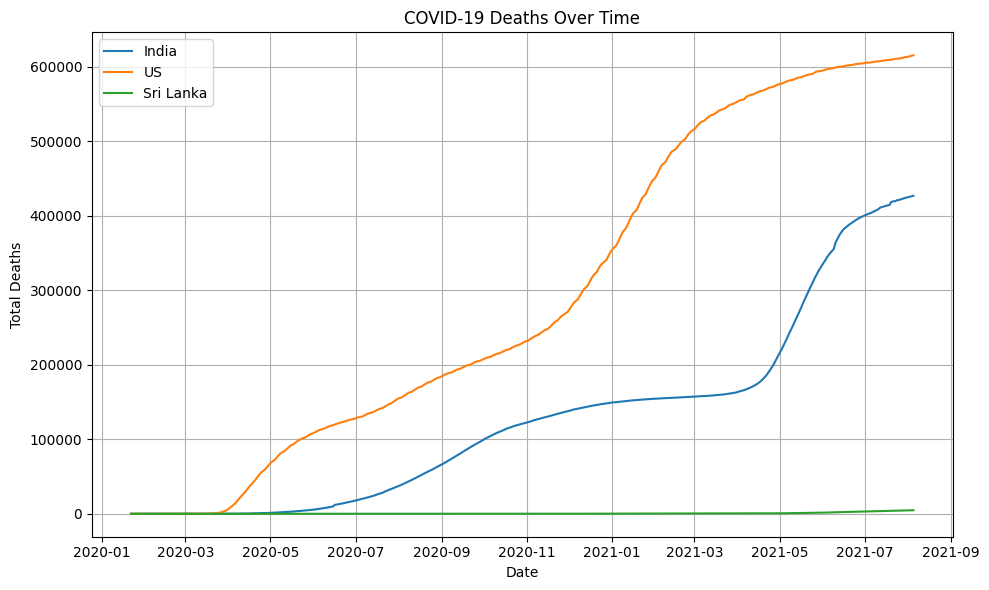

In [6]:
# Plot death trends
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = deaths_filtered[deaths_filtered["Country/Region"] == country]
    plt.plot(country_data["Date"], country_data["Deaths"], label=country)

plt.title("COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


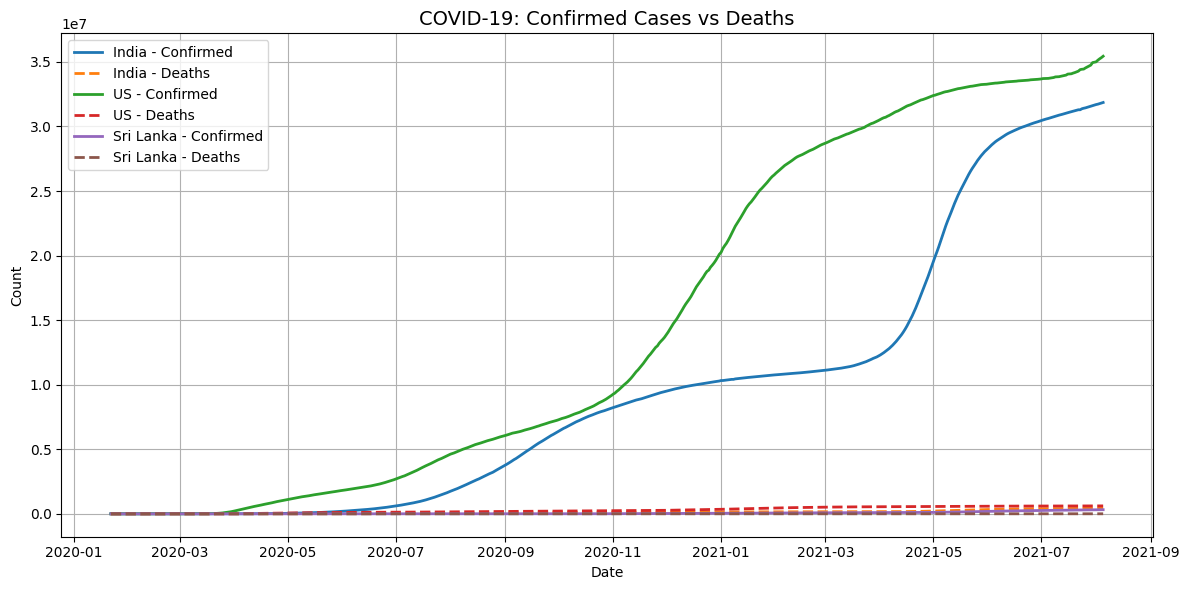

In [ ]:
# Combined Confirmed and Deaths
plt.figure(figsize=(12, 6))

for country in countries:
    # Confirmed cases
    conf_data = filtered_df[filtered_df["Country/Region"] == country]
    plt.plot(conf_data["Date"], conf_data["Confirmed"],
             label=f"{country} - Confirmed", linewidth=2)

    # Deaths
    death_data = deaths_filtered[deaths_filtered["Country/Region"] == country]
    plt.plot(death_data["Date"], death_data["Deaths"],
             linestyle='--', label=f"{country} - Deaths", linewidth=2)


plt.title("COVID-19: Confirmed Cases vs Deaths", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Merge confirmed and deaths
merged = pd.merge(filtered_df, deaths_filtered,
                  on=["Country/Region", "Date"],
                  suffixes=("_Confirmed", "_Deaths"))

# Calculate death rate
merged["Death Rate (%)"] = np.where(
    merged["Confirmed"] > 0,
    (merged["Deaths"] / merged["Confirmed"]) * 100,
    0
)


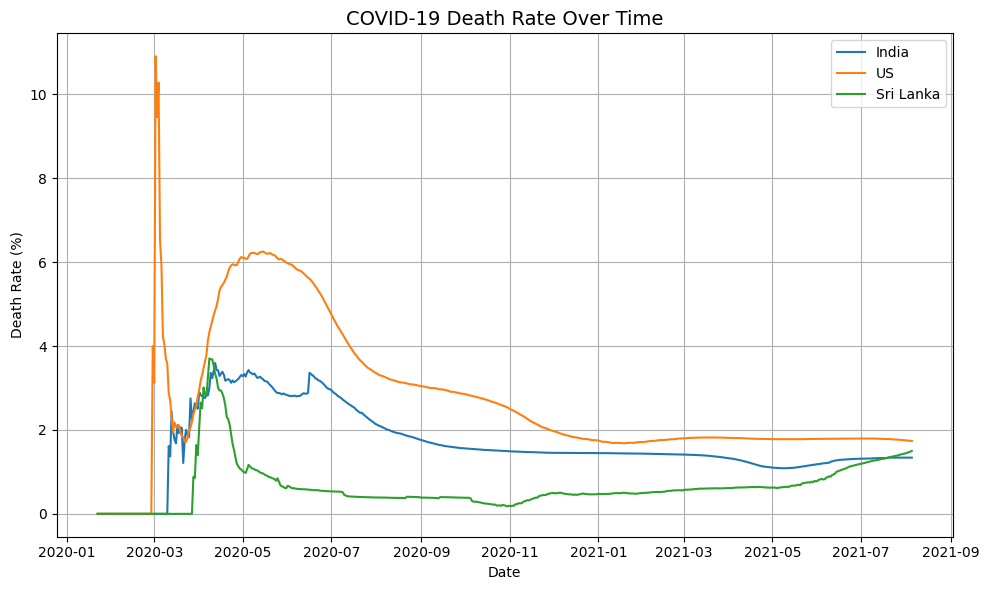

In [ ]:

plt.figure(figsize=(10, 6))

for country in countries:
    country_data = merged[merged["Country/Region"] == country]
    plt.plot(country_data["Date"], country_data["Death Rate (%)"], label=country)

plt.title("COVID-19 Death Rate Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Death Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
